In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [204]:
data = pd.read_csv('Earthquate_Damage.csv') 
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [205]:
def data_explanation(data, name):
    """
    create a txt file that contains the explanation of the data
    """
    
    with open(f'./data_description_{name}.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
    
data_explanation(data, 'earthquake')

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Data Description file 참조 결과,

- building ID는 unique data 개수가 총 데이터 수와 같아, 제거 되어야함. Unnecessary Identifiers

- info() function 결과를 보면 모든 columnn에 null 값이 없음을 볼 수 있음.

[1] 입력 변수의 속성이 numeric 이 아닌 변수들에 대해 1-of-C coding (1-hot encoding) 방식을 통해 
명목형(요인형) 변수를 범주의 개수만큼의 이진형(binary)  변수들로 구성되는 dummy  variable  을 
생성하시오.

In [207]:
features = data.drop(['building_id','damage_grade'], axis = 1)
target = data['damage_grade']

In [208]:
#Object type features list
OHE_features = list(features.select_dtypes(include = ['object']).columns)
len(OHE_features)

8

In [209]:
OHE_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [210]:
# one hot encoding
OHE = OneHotEncoder(drop='first')
One_hot_encoded = OHE.fit_transform(features[OHE_features])
One_hot_encoded_dt = pd.DataFrame(One_hot_encoded.toarray(), columns = OHE.get_feature_names_out(OHE_features))

features = features.drop(OHE_features, axis = 1)
features = pd.concat([features, One_hot_encoded_dt], axis = 1)

features.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,900,2812,2,10,8,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,363,8973,2,10,5,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,22,418,10694,2,10,6,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11,131,1488,3,30,8,9,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [211]:
# scale the numerical features   
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(features[numerical_columns])
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical_columns)

features = features.drop(numerical_columns, axis = 1)
features = pd.concat([scaled_numerical, features], axis = 1)

features.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,0.038365,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,0.038365,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[2] 전체 데이터셋을 임의로 150,000 개의 빌딩이 포함된 Training dataset 과 50,000 개의 Validation 
dataset, 그리고 60,601 개의 Test dataset 으로 구분한 뒤 다음 각 물음에 답하시오. 분류 성능을 
평가/비교할 때는 3-class classification 의 Accuracy 와 Balanced Correction Rate (BCR)을 이용하시오.

In [212]:
# train test split
X_train_L, X_test, y_train_L, y_test = train_test_split(features, target, test_size = 60601, random_state = 42)
# train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_L, y_train_L, test_size = 50000, random_state = 42)

print(len(X_train), len(X_valid), len(X_test))

150000 50000 60601


In [213]:
# performance evaluation function
from sklearn.metrics import confusion_matrix

def perf_eval_fc(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    #cm 3x3 matrix
    accuracy = np.trace(cm) / np.sum(cm)
    BCR = np.cbrt(cm[0,0]/np.sum(cm[0,:]) * cm[1,1]/np.sum(cm[1,:]) * cm[2,2]/np.sum(cm[2,:]))
    return accuracy, BCR
    
    
perf_table = pd.DataFrame(columns = ['Accuracy', 'BCR'])
perf_table
    

,Accuracy,BCR


# Parameters Setting

[Q1] 다음과 같이 세 가지 단일 모형에 대하여 분류 모델을 구축하고 Accuracy 와 BCR 관점에서 분류 
정확도를 비교해보시오. CART 와 ANN 의 경우 hyperparameter 후보 값들을 명시하고 Validation 
dataset 을 통해서 최적의 값을 찾아서 Test 에 사용하시오.

## Multinomial Logistic Regression

In [214]:
#import multinomial logistic regression
from sklearn.linear_model import LogisticRegression
import pickle
try:#load the prediction dataset
    y_pred = pd.read_csv("logreg_pred.csv", index_col=0)
except:
    #train the model
    logreg = LogisticRegression(solver='sag', max_iter=1000, 
                                multi_class='multinomial', random_state=42, verbose=1)

    logreg.fit(X_train, y_train)
    best_cutoff_BCR_score = 0
    best_cutoff_BCR = None
    
    #Use validation set to find best cutoff Value

    for cutoff_2 in np.arange(0.1, 0.9, 0.1):
        for cutoff_3 in np.arange(cutoff_2, 0.9, 0.1):
            y_pred = logreg.predict_proba(X_valid)
            y_pred = np.where(y_pred[:,0] > cutoff_2, 1, np.where(y_pred[:,1] > cutoff_3, 2, 3))
            accuracy, BCR = perf_eval_fc(y_pred, y_valid)
            if BCR > best_cutoff_BCR_score:
                best_cutoff_BCR_score = BCR
                best_cutoff_BCR = [cutoff_2, cutoff_3]
                
    print(f'Best cutoff value for BCR: {best_cutoff_BCR}')
    
    logreg = LogisticRegression(solver='sag', max_iter=1000,
                                multi_class='multinomial', random_state=42, verbose=1)
    
    logreg.fit(X_train_L, y_train_L)
    
    y_pred = logreg.predict_proba(X_test)
    y_pred = np.where(y_pred[:,0] > best_cutoff_BCR[0], 1, np.where(y_pred[:,1] > best_cutoff_BCR[1], 2, 3))
    
    y_pred = pd.DataFrame(y_pred, columns = ['damage_grade'])
    y_pred.to_csv("logreg_pred.csv")
    
y_pred = y_pred['damage_grade'].astype(int)

#performance evaluation
perf_table.loc['Logistic Regression'] = perf_eval_fc(y_pred, y_test)
perf_table


,Accuracy,BCR
Logistic Regression,0.505355,0.558135


## Classification and Regression Tree (CART) 

In [215]:
tree_perf_table = pd.DataFrame(columns = ['Accuracy', 'BCR'])

In [216]:
from sklearn.tree import DecisionTreeClassifier

try:
    #load the model
    full_tree = pickle.load(open('full_tree_model.sav', 'rb'))
    
except:
    full_tree = DecisionTreeClassifier(random_state=42)
    full_tree.fit(X_train, y_train)
    
    #save the model
    pickle.dump(full_tree, open('full_tree_model.sav','wb'))

y_pred = full_tree.predict(X_test)
tree_perf_table.loc['Full Tree'] = perf_eval_fc(y_pred, y_test)

tree_perf_table

,Accuracy,BCR
Full Tree,0.647168,0.596013


In [217]:
from sklearn.model_selection import ParameterGrid

try:
    #load the model
    best_pre_pruning = pickle.load(open('best_pre_pruning_model.sav', 'rb'))
except:
    # Pre Pruning parameters
    pre_pruning_hyperparameters = {
        'max_depth': [2, 4, 8, 16, 32, 64, 128],
        'min_samples_split': [2, 4, 8, 16, 32, 64],
    }  
    best_hyperparmeter_pre_pruning_score = 0
    best_hyperparmeter_pre_pruning = None
    
    hyperparameters = list(ParameterGrid(pre_pruning_hyperparameters))
    for hyperparameter in hyperparameters:
        pre_pruning = DecisionTreeClassifier(random_state=42, **hyperparameter)
        pre_pruning.fit(X_train, y_train)
        ACC, BCR = perf_eval_fc(pre_pruning.predict(X_valid), y_valid)
        print(f'hyperparameter: {hyperparameter}, BCR: {BCR}')
        if BCR > best_hyperparmeter_pre_pruning_score:
            best_hyperparmeter_pre_pruning_score = BCR
            best_hyperparmeter_pre_pruning = hyperparameter
    
    best_pre_pruning = DecisionTreeClassifier(random_state=42, **best_hyperparmeter_pre_pruning)
    best_pre_pruning.fit(X_train_L, y_train_L)
    
    #save model
    pickle.dump(best_pre_pruning, open('best_pre_pruning_model.sav', 'wb'))
    
    
tree_perf_table.loc['Pre Pruning'] = perf_eval_fc(best_pre_pruning.predict(X_test), y_test)
tree_perf_table


,Accuracy,BCR
Full Tree,0.647168,0.596013
Pre Pruning,0.700005,0.628834


In [218]:
perf_table.loc['CART'] = perf_eval_fc(best_pre_pruning.predict(X_test), y_test)
perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834


In [219]:
best_pre_pruning.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 64,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 32,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [220]:
perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834


## Artificial Neural Network (ANN) 

In [221]:
neural_network_hyperparameters = {
    'hidden_layer_sizes': [(30,), (50,), (100,), (100, 100), (100, 100, 100)],
}

from sklearn.neural_network import MLPClassifier

try:
    #load the model
    best_nn = pickle.load(open('best_nn_model.sav', 'rb'))

except:
    nn1 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(30,), solver='lbfgs', tol=1e-2, early_stopping=True)
    nn1.fit(X_train, y_train)
    
    nn2 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(50,), solver='lbfgs', tol=1e-2, early_stopping=True)
    nn2.fit(X_train, y_train)
    
    nn3 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,), solver='lbfgs', tol=1e-2, early_stopping=True)
    nn3.fit(X_train, y_train)
    
    nn4 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 100), solver='lbfgs', tol=1e-2, early_stopping=True)
    nn4.fit(X_train, y_train)
    
    nn5 = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 100, 100), solver='lbfgs', tol=1e-2, early_stopping=True)
    nn5.fit(X_train, y_train)
    
    _, nn1_BCR = perf_eval_fc(nn1.predict(X_valid), y_valid)
    best_nn = nn1
    best_BCR = nn1_BCR
    _, nn2_BCR = perf_eval_fc(nn2.predict(X_valid), y_valid)
    if nn2_BCR > nn1_BCR:
        best_nn = nn2
        best_BCR = nn2_BCR
    _, nn3_BCR = perf_eval_fc(nn3.predict(X_valid), y_valid)
    if nn3_BCR > best_BCR:
        best_nn = nn3
        best_BCR = nn3_BCR
    _, nn4_BCR = perf_eval_fc(nn4.predict(X_valid), y_valid)
    if nn4_BCR > best_BCR:
        best_nn = nn4
        best_BCR = nn4_BCR
    _, nn5_BCR = perf_eval_fc(nn5.predict(X_valid), y_valid)
    if nn5_BCR > best_BCR:
        best_nn = nn5
        best_BCR = nn5_BCR
    
    best_hidden_layer_sizes = best_nn.get_params()['hidden_layer_sizes']
    print('Best hidden layer sizes:', best_hidden_layer_sizes)
    
    best_nn = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=best_hidden_layer_sizes, solver='lbfgs', tol=1e-2, early_stopping=True)
    best_nn.fit(X_train_L, y_train_L)
    #save model
    pickle.dump(best_nn, open('best_nn_model.sav', 'wb'))
    
    
perf_table.loc['ANN'] = perf_eval_fc(best_nn.predict(X_test), y_test)

perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.598340,0.424984


In [222]:
#best parameters
best_depth = best_pre_pruning.get_params()['max_depth']
best_min_samples_split = best_pre_pruning.get_params()['min_samples_split']

best_hidden_layer_sizes = best_nn.get_params()['hidden_layer_sizes']

In [223]:
print('Best depth: ', best_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best hidden_layer_sizes: ', best_hidden_layer_sizes)

Best depth:  64
Best min_samples_split:  32
Best hidden_layer_sizes:  (100,)


# Ensemble Learning

[Q2] CART 의 Bagging 모델을 Bootstrap 의 수를 30 부터 30 단위로 300 까지 증가시키면서 분류 정확도를 
평가해보시오. 최적의 Bootstrap 수는 몇으로 확인되는가? 이 모델은 단일 모형과 비교했을 때 성능의 
향상이 있는가?

## Bagging (CART)

In [224]:
# Bagging Training
from sklearn.ensemble import BaggingClassifier

try:
    #load the model
    bagging = pickle.load(open('bagging_CART_model.sav', 'rb'))
    #Load the bootstrap
    bagging_bootstrap = pd.read_csv('bagging_CART_bootstrap.csv', index_col=0)

except:
    best_bagging_BCR = 0
    bagging_bootstrap = []
    for n_bootstrap in range(30, 301, 30):
        bagging = BaggingClassifier(base_estimator=best_pre_pruning, 
                                    n_estimators=n_bootstrap, random_state=42,
                                    bootstrap=True,n_jobs=-1,
                                    verbose=1)
        bagging.fit(X_train, y_train)
        
        _, bagging_BCR = perf_eval_fc(bagging.predict(X_valid), y_valid)
        bagging_bootstrap.append(bagging_BCR)
        
        if  bagging_BCR >= best_bagging_BCR:
            best_bagging = bagging
            best_bagging_BCR = bagging_BCR
            best_bagging_Bootstrap = n_bootstrap
            
    bagging = BaggingClassifier(base_estimator=best_pre_pruning,
                                n_estimators=best_bagging_Bootstrap, random_state=42,
                                bootstrap=True,n_jobs=-1,
                                verbose=1)
    
    bagging.fit(X_train_L, y_train_L)
    
    #save model
    pickle.dump(bagging, open('bagging_CART_model.sav', 'wb'))
    #save dataframe
    pd.DataFrame(bagging_bootstrap).to_csv('bagging_CART_bootstrap.csv', index=False)
    
    
perf_table.loc['Bagging (CART)'] = perf_eval_fc(bagging.predict(X_test), y_test)

# best bootstrap
best_bagging_Bootstrap = bagging.get_params()['n_estimators']
print('Best bootstrap: ', best_bagging_Bootstrap)

perf_table


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   31.2s remaining:  1.6min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.5s finished


Best bootstrap:  210


,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.598340,0.424984
Bagging (CART),0.738833,0.629297


In [225]:
bagging_bootstrap = pd.read_csv('bagging_CART_bootstrap.csv', index_col=0)
bagging_bootstrap['Bootstrap'] = range(30, 301, 30)
bagging_bootstrap['BCR'] = bagging_bootstrap.index
bagging_bootstrap.index = [bagging_bootstrap['Bootstrap']]
bagging_bootstrap.drop(columns=['Bootstrap'], inplace=True)
bagging_bootstrap.sort_values(by='BCR', ascending=False, inplace=True)
bagging_bootstrap

,BCR
Bootstrap,
210,0.625923
180,0.625803
240,0.625393
300,0.625355
270,0.625347
150,0.624926
120,0.624496
90,0.623869
60,0.623672


## Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

try:
    #load the model
    random_forest = pickle.load(open('random_forest_model.sav', 'rb'))
    #Load the bootstrap
    RF_bootstrap = pd.read_csv('random_forest_bootstrap.csv', index_col=0)

except:
    best_RF_BCR = 0
    RF_bootstrap = []
    for n_bootstrap in range(30, 301, 30):
        random_f = RandomForestClassifier(n_estimators=n_bootstrap,
                                          max_depth=best_depth,
                                          min_samples_split=best_min_samples_split,
                                          random_state=42, n_jobs=-1, verbose=1)
        random_f.fit(X_train, y_train)
        
        _, random_f_BCR = perf_eval_fc(random_f.predict(X_valid), y_valid)
        RF_bootstrap.append(random_f_BCR)
        if  random_f_BCR >= best_RF_BCR:
            best_RF = random_f
            best_RF_BCR = random_f_BCR
            best_RF_Bootstrap = n_bootstrap
            
    random_forest = RandomForestClassifier(n_estimators=best_RF_Bootstrap,
                                             max_depth=best_depth,
                                                min_samples_split=best_min_samples_split,
                                                random_state=42, n_jobs=-1, verbose=1)
    
    random_forest.fit(X_train_L, y_train_L)
    #save model
    pickle.dump(random_forest, open('random_forest_model.sav', 'wb'))
    #save dataframe
    pd.DataFrame(RF_bootstrap).to_csv('random_forest_bootstrap.csv', index=False)

perf_table.loc['Random Forest'] = perf_eval_fc(random_forest.predict(X_test), y_test)

# best bootstrap
best_RF_Bootstrap = random_forest.get_params()['n_estimators']
print('Best bootstrap: ', best_RF_Bootstrap)

perf_table

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 270 out of 270 | elapsed:    2.9s finished


Best bootstrap:  270


,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.598340,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.569250


In [227]:
RF_bootstrap

""
0
0.565232
0.566201
0.565874
0.564700
0.563731
0.564978
0.565843
0.565958
0.566641


In [228]:
perf_table.iloc[3:5,:]

,Accuracy,BCR
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.569250


In [229]:
bagging_bootstrap = pd.read_csv('bagging_CART_bootstrap.csv', index_col=0)
bagging_bootstrap = bagging_bootstrap.index.to_list()
bagging_bootstrap = pd.DataFrame(bagging_bootstrap, columns=['BCR'])
bagging_bootstrap.index = range(30, 301, 30)
bagging_bootstrap

,BCR
30,0.622391
60,0.623672
90,0.623869
120,0.624496
150,0.624926
180,0.625803
210,0.625923
240,0.625393
270,0.625347
300,0.625355


In [230]:
BCR_bootstrap = RF_bootstrap.index.to_list()
BCR_bootstrap_df = pd.DataFrame(BCR_bootstrap, columns=['BCR'])
BCR_bootstrap_df.index = range(30, 301, 30)
BCR_bootstrap_df

,BCR
30,0.565232
60,0.566201
90,0.565874
120,0.564700
150,0.563731
180,0.564978
210,0.565843
240,0.565958
270,0.566641
300,0.566372


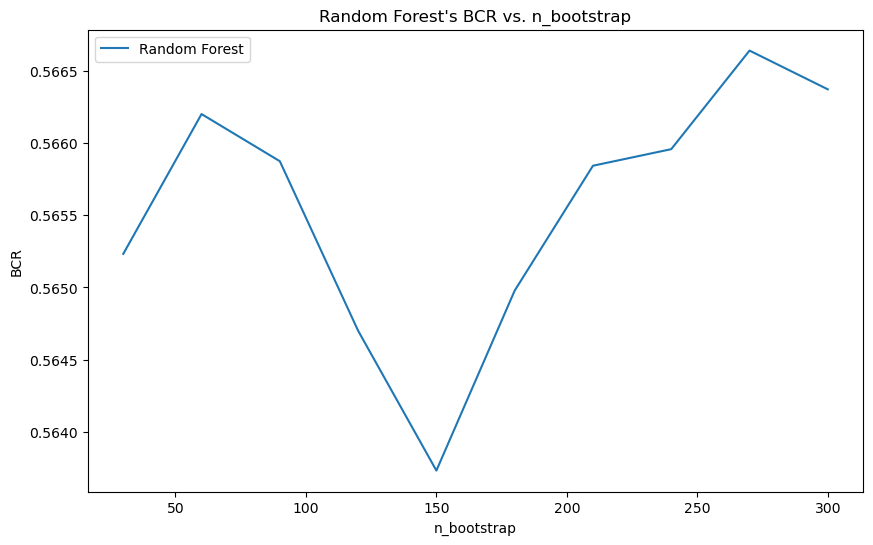

In [231]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(BCR_bootstrap_df, label='Random Forest')

plt.title("Random Forest's BCR vs. n_bootstrap")
plt.xlabel('n_bootstrap')
plt.ylabel('BCR')
plt.legend()
plt.show()

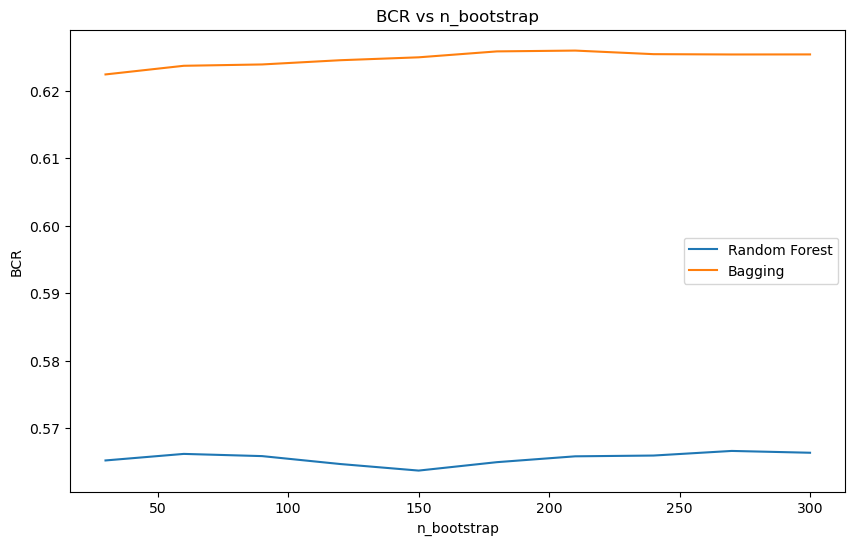

In [232]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(BCR_bootstrap_df, label='Random Forest')
plt.plot(bagging_bootstrap, label='Bagging')
plt.title("BCR vs n_bootstrap")
plt.xlabel('n_bootstrap')
plt.ylabel('BCR')
plt.legend()
plt.show()

In [233]:
RF_var_imp = random_forest.feature_importances_

RF_var_imp_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': RF_var_imp})

RF_var_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

RF_var_imp_df

,Variable,Importance
0,geo_level_1_id,0.238646
1,geo_level_2_id,0.117843
2,geo_level_3_id,0.088225
4,age,0.053919
5,area_percentage,0.050086
6,height_percentage,0.041329
33,foundation_type_r,0.037566
9,has_superstructure_mud_mortar_stone,0.029354
3,count_floors_pre_eq,0.026938
39,ground_floor_type_v,0.025638


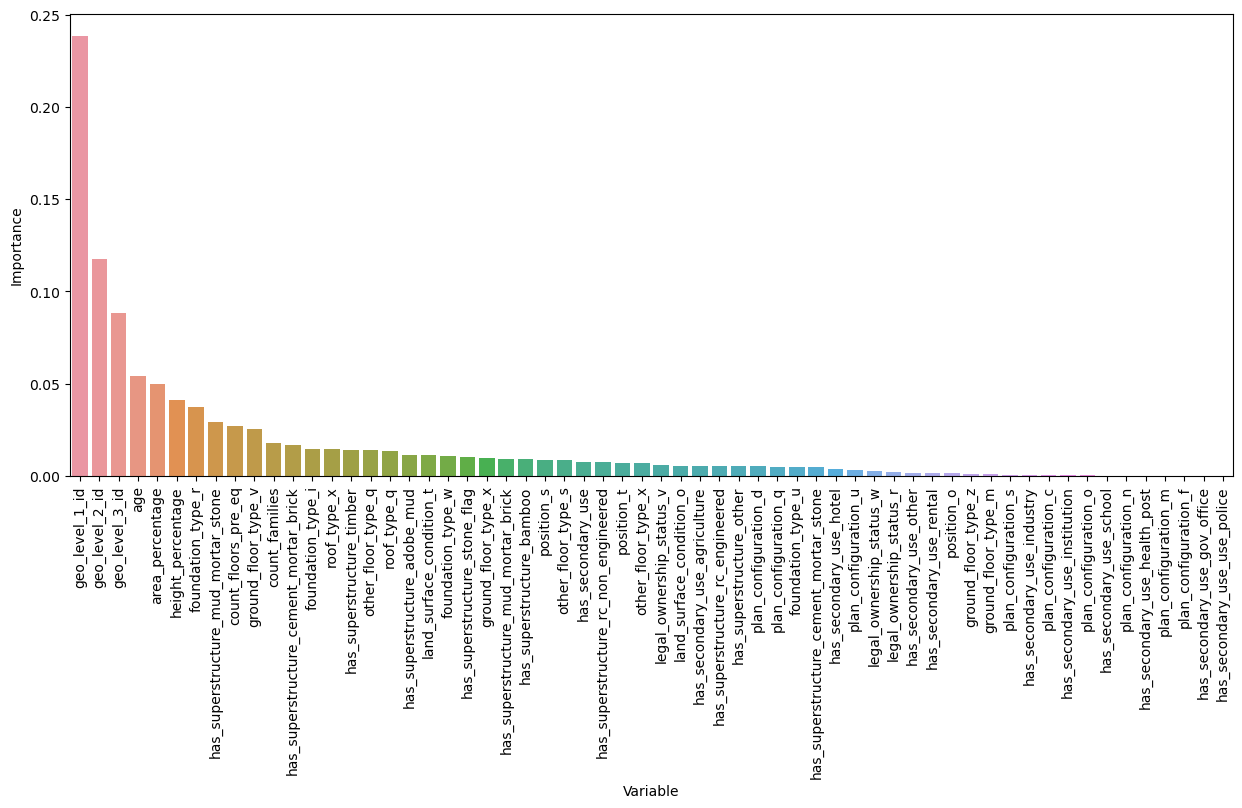

In [234]:
plt.figure(figsize=(15,6))
sns.barplot(x='Variable', y='Importance', data=RF_var_imp_df)
plt.xticks(rotation=90)
plt.show()

## ANN 10

[Q4] [Q1]에서 찾은 최적의 hyperparameter 를 이용하여 ANN 단일모형을 10 번 반복하여 테스트 정확도를 
평가해보시오. Accuracy 와 BCR 의 평균 및 표준편차를 기록하시오.

In [235]:
from tqdm import tqdm

try:
    #load mean, std
    mean_std_ACC_BCR = pd.read_csv('mean_std_ACC_BCR.csv', index_col=0)
    mean_ANN_accuracy = mean_std_ACC_BCR.loc['ANN', 'mean_accuracy']
    std_ANN_accuracy = mean_std_ACC_BCR.loc['ANN', 'std_accuracy']
    mean_ANN_BCR = mean_std_ACC_BCR.loc['ANN', 'mean_BCR']
    std_ANN_BCR = mean_std_ACC_BCR.loc['ANN', 'std_BCR']
    
except:
    ANN_accuracy = []
    ANN_BCR = []
    for i in tqdm(range(10)):
        # random state를 i로 설정해, 각각의 ANN 모델이 다른 결과를 출력하도록 설정
        ANN = MLPClassifier(random_state=i, max_iter=1000, hidden_layer_sizes=best_hidden_layer_sizes, verbose = 0, tol=1e-2, early_stopping=True, solver = 'lbfgs')
        ANN.fit(X_train_L, y_train_L)
        y_pred = ANN.predict(X_test)
        accuracy, BCR = perf_eval_fc(y_pred, y_test)
        ANN_accuracy.append(accuracy)
        ANN_BCR.append(BCR)
        
    ANN_accuracy = np.array(ANN_accuracy)
    ANN_BCR = np.array(ANN_BCR)

    mean_ANN_accuracy = np.mean(ANN_accuracy)
    std_ANN_accuracy = np.std(ANN_accuracy)

    mean_ANN_BCR = np.mean(ANN_BCR)
    std_ANN_BCR = np.std(ANN_BCR)
    #save dataframe
    mean_std_ACC_BCR = pd.DataFrame({'mean_accuracy': [mean_ANN_accuracy], 'std_accuracy': [std_ANN_accuracy],
                                        'mean_BCR': [mean_ANN_BCR], 'std_BCR': [std_ANN_BCR]}, index=['ANN'])
    mean_std_ACC_BCR.to_csv('mean_std_ACC_BCR.csv')
    
mean_ANN_accuracy, std_ANN_accuracy, mean_ANN_BCR, std_ANN_BCR = round(mean_ANN_accuracy, 6), round(std_ANN_accuracy, 6), round(mean_ANN_BCR,6), round(std_ANN_BCR,6)
perf_table.loc['ANN_10']=[f'{mean_ANN_accuracy}({std_ANN_accuracy})', f'{mean_ANN_BCR}({std_ANN_BCR})']

perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)


## ANN Bagging

In [236]:
base_learner = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=best_hidden_layer_sizes, verbose = 0, tol=1e-2, early_stopping=True, solver = 'lbfgs')

- validation dataset을 이용, 10회 반복으로 최적의 bootstrap 개수 알아내기.

In [237]:
from tqdm import tqdm
from IPython import display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

try:
    ANN_bagging_bootstrap = pd.read_csv('ANN_bagging_bootstrap.csv', index_col=0)
except FileNotFoundError:
    Bagging_ANN_mean_ACC = []
    Bagging_ANN_mean_BCR = []
    Bagging_ANN_std_ACC = []
    Bagging_ANN_std_BCR = []

    bootstrap_range = range(30, 301, 30)
    for bootstrap in tqdm(bootstrap_range):
        ANN_bagging_ACC_list = []
        ANN_bagging_BCR_list = []
        for i in tqdm(range(10)):
            ANN_bagging_temp = BaggingClassifier(base_estimator=base_learner, n_estimators=bootstrap, bootstrap=True, n_jobs=-1, random_state=i)
            ANN_bagging_temp.fit(X_train, y_train)
            ANN_bagging_Accuracy, ANN_bagging_BCR = perf_eval_fc(ANN_bagging_temp.predict(X_valid), y_valid)
            ANN_bagging_ACC_list.append(ANN_bagging_Accuracy)
            ANN_bagging_BCR_list.append(ANN_bagging_BCR)
            print(f"Bootstrap: {bootstrap}, {i}th iteration done")
            print(ANN_bagging_ACC_list, ANN_bagging_BCR_list)

        Bagging_ANN_mean_ACC.append(np.mean(ANN_bagging_ACC_list))
        Bagging_ANN_std_ACC.append(np.std(ANN_bagging_ACC_list))
        Bagging_ANN_mean_BCR.append(np.mean(ANN_bagging_BCR_list))
        Bagging_ANN_std_BCR.append(np.std(ANN_bagging_BCR_list))


    ANN_bagging_bootstrap = pd.DataFrame({'n_bootstrap': range(30, 301, 30),
                                          'mean_accuracy': Bagging_ANN_mean_ACC,
                                          'std_accuracy': Bagging_ANN_std_ACC,
                                          'mean_BCR': Bagging_ANN_mean_BCR,
                                          'std_BCR': Bagging_ANN_std_BCR})
    # Save dataframe
    ANN_bagging_bootstrap.to_csv('ANN_bagging_bootstrap.csv', index=False)
    ANN_bagging_bootstrap = pd.read_csv('ANN_bagging_bootstrap.csv', index_col=0)


In [238]:
ANN_bagging_bootstrap_sorted = ANN_bagging_bootstrap.sort_values(by='mean_BCR', ascending=False)
ANN_bagging_bootstrap_sorted = round(ANN_bagging_bootstrap_sorted,6)

ANN_bagging_bootstrap_sorted

,mean_accuracy,std_accuracy,mean_BCR,std_BCR
n_bootstrap,,,,
180,0.59643,0.00063,0.358191,0.003735
210,0.59627,0.00027,0.357721,0.001977
150,0.59629,0.00045,0.357713,0.003825
120,0.59604,0.00000,0.357653,0.000596
300,0.59650,0.00024,0.357579,0.002071
270,0.59650,0.00042,0.357528,0.002960
240,0.59636,0.00020,0.357437,0.002140
90,0.59553,0.00009,0.354406,0.001465
60,0.59463,0.00039,0.350964,0.001148


- 최적 bootstrap개수 이용. 10회 반복으로 mean, std 알아내기 (ANN10과 비교용)

In [239]:
best_bootstrap = ANN_bagging_bootstrap_sorted.index[0]
best_bootstrap

180

In [240]:

try:
    optimized_bagging = pd.read_csv('ANN_bagging_best_bootstrap.csv', index_col=0)
    
except:
    ANN_bagging_best_bootstrap_ACC = []
    ANN_bagging_best_bootstrap_BCR = []
    for i in tqdm(range(10)):
        ANN_bagging_best = BaggingClassifier(base_estimator=base_learner, n_estimators=best_bootstrap, bootstrap=True, n_jobs=-1, random_state=i)
        ANN_bagging_best.fit(X_train_L, y_train_L)
        ACC, BCR = perf_eval_fc(ANN_bagging_best.predict(X_test), y_test)
        ANN_bagging_best_bootstrap_ACC.append(ACC)
        ANN_bagging_best_bootstrap_BCR.append(BCR)
        
    ANN_bagging_best_bootstrap_ACC = np.array(ANN_bagging_best_bootstrap_ACC)
    ANN_bagging_best_bootstrap_BCR = np.array(ANN_bagging_best_bootstrap_BCR)
    ANN_bagging_best_bootstrap_mean_ACC = np.mean(ANN_bagging_best_bootstrap_ACC)
    ANN_bagging_best_bootstrap_std_ACC = np.std(ANN_bagging_best_bootstrap_ACC)
    ANN_bagging_best_bootstrap_mean_BCR = np.mean(ANN_bagging_best_bootstrap_BCR)
    ANN_bagging_best_bootstrap_std_BCR = np.std(ANN_bagging_best_bootstrap_BCR)
    
    optimized_bagging = pd.DataFrame({'mean_accuracy': [ANN_bagging_best_bootstrap_mean_ACC], 'std_accuracy': [ANN_bagging_best_bootstrap_std_ACC],
                  'mean_BCR': [ANN_bagging_best_bootstrap_mean_BCR], 'std_BCR': [ANN_bagging_best_bootstrap_std_BCR]}, index=['ANN_bagging'])
    optimized_bagging.to_csv('ANN_bagging_best_bootstrap.csv')

In [241]:
optimized_bagging = round(optimized_bagging, 6)
perf_table.loc['ANN_bagging_10'] = [f'{optimized_bagging.iloc[0,0]}({optimized_bagging.iloc[0,1]})', f'{optimized_bagging.iloc[0,2]}({optimized_bagging.iloc[0,3]})']

perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)


In [242]:
round(pd.DataFrame([perf_table.loc['ANN_10'], perf_table.loc['ANN_bagging_10']],),6)

,Accuracy,BCR
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)


타 모델과 비교용 randomstate = 42의 ANN bagging optimized 모델 성능 얻기 LR, CART 등 다른 모델들과 비교용

In [243]:
try:
    #load model
    ANN_bagging_optimized = pickle.load(open('ANN_bagging_optimized.pkl', 'rb'))
    
    
except:
    ANN_bagging_optimized = BaggingClassifier(base_estimator=base_learner, n_estimators=best_bootstrap, bootstrap=True, n_jobs=-1, random_state=42)
    ANN_bagging_optimized.fit(X_train_L, y_train_L)
    
    #save model
    pickle.dump(ANN_bagging_optimized, open('ANN_bagging_optimized.pkl', 'wb'))
    
perf_table.loc['Bagging (ANN)'] = perf_eval_fc(ANN_bagging_optimized.predict(X_test), y_test)

perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)
Bagging (ANN),0.595997,0.35536


In [244]:
perf_table.loc[['Logistic Regression', 'CART','ANN','Bagging (CART)','Random Forest', 'Bagging (ANN)']]

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
Bagging (ANN),0.595997,0.35536


## Adaptive Boosting

In [245]:
# AdaBoost

from tqdm import tqdm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ParameterGrid


Adaboost_hyperparameters = {'n_estimators': [30, 90, 150, 210],
                            'base_estimator' : [DecisionTreeClassifier(max_depth=1, random_state=42),
                                                best_pre_pruning,]}
Adaboost_hyperparameters_list = list(ParameterGrid(Adaboost_hyperparameters))

                                             

try:
    #load the model
    adaboost_model = pickle.load(open('adaboost_model.sav', 'rb'))
except FileNotFoundError:
    # train the model
    best_adaboost_score = 0
    for i in tqdm(Adaboost_hyperparameters_list, leave=False): 
        adaboost_temp = AdaBoostClassifier(**i, random_state=42)
        adaboost_temp.fit(X_train, y_train)
        _, adaboost_temp_BCR = perf_eval_fc(adaboost_temp.predict(X_valid), y_valid)
        if adaboost_temp_BCR > best_adaboost_score:
            best_adaboost_score = adaboost_temp_BCR
            best_adaboost_model = adaboost_temp
            print(f"AdaBoost: {i} done")
        
    best_adaboost = best_adaboost_model
    best_adaboost_parameters = best_adaboost_model.get_params()
    best_n_estimators = best_adaboost_parameters['n_estimators']
    best_base_estimator = best_adaboost_parameters['base_estimator']
    adaboost_model = AdaBoostClassifier(n_estimators=best_n_estimators, base_estimator= best_base_estimator, random_state=42)
    adaboost_model.fit(X_train_L, y_train_L)
    
    # Save model
    pickle.dump(adaboost_model, open('adaboost_model.sav', 'wb'))
    
print(f'best_adaboost_parameters : {adaboost_model.get_params()}')
    
perf_table.loc['AdaBoost'] = perf_eval_fc(adaboost_model.predict(X_test), y_test)

perf_table
    
    

best_adaboost_parameters : {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 32, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 32, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': 42, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=32, min_samples_split=32, random_state=42), 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 210, 'random_state': 42}


,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945


In [246]:
perf_table.drop(['ANN_10','ANN_bagging_10'], axis=0,)

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945


## Gradient Boosting Machine

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_hyperparameters = {'n_estimators': [30, 90, 150, 210, 390],
                                     'subsample': [0.1, 0.5, 1],
                                     'max_depth': [1, 3, 5, 7, 8, 16, 32, 64],
                                     'min_samples_split'  : [2,8, 16, 32, 64],
}

gradient_boosting_hyperparameters_list = list(ParameterGrid(gradient_boosting_hyperparameters))

try:
    #load the model
    gbm_model = pickle.load(open('gbm_model.sav', 'rb'))
except:
    # train the model
    best_gbm_score = 0
    for i in tqdm(gradient_boosting_hyperparameters_list, leave=False): 
        gbm_temp = GradientBoostingClassifier(**i, random_state=42)
        gbm_temp.fit(X_train, y_train)
        _, gbm_temp_BCR = perf_eval_fc(gbm_temp.predict(X_valid), y_valid)
        if gbm_temp_BCR > best_gbm_score:
            best_gbm_score = gbm_temp_BCR
            best_gbm_model = gbm_temp
            print(f"GBM: {i} done")
        
    best_gbm = best_gbm_model
    best_gbm_parameters = best_gbm_model.get_params()
    best_n_estimators = best_gbm_parameters['n_estimators']
    best_subsample = best_gbm_parameters['subsample']
    best_max_depth = best_gbm_parameters['max_depth']
    best_max_features = best_gbm_parameters['max_features']
    gbm_model = GradientBoostingClassifier(n_estimators=best_n_estimators, subsample=best_subsample, max_depth=best_max_depth, max_features=best_max_features, random_state=42)
    gbm_model.fit(X_train_L, y_train_L)
    
    # Save model
    pickle.dump(gbm_model, open('gbm_model.sav', 'wb'))
    
print(f'best_gbm_parameters : {gbm_model.get_params()}')

perf_table.loc['GBM'] = perf_eval_fc(gbm_model.predict(X_test), y_test)

perf_table
                                        

best_gbm_parameters : {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 7, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 390, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882


In [248]:
perf_table.drop(['ANN_10','ANN_bagging_10'], axis=0,)

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882


In [249]:
var_imp = gbm_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = X_train.columns
).sort_values('variables importance', ascending=False)
var_imp_df

,variables importance
geo_level_1_id,0.308321
geo_level_2_id,0.157453
geo_level_3_id,0.089754
foundation_type_r,0.077007
ground_floor_type_v,0.047056
age,0.038004
area_percentage,0.029730
has_superstructure_mud_mortar_stone,0.026631
height_percentage,0.023457
count_floors_pre_eq,0.019858


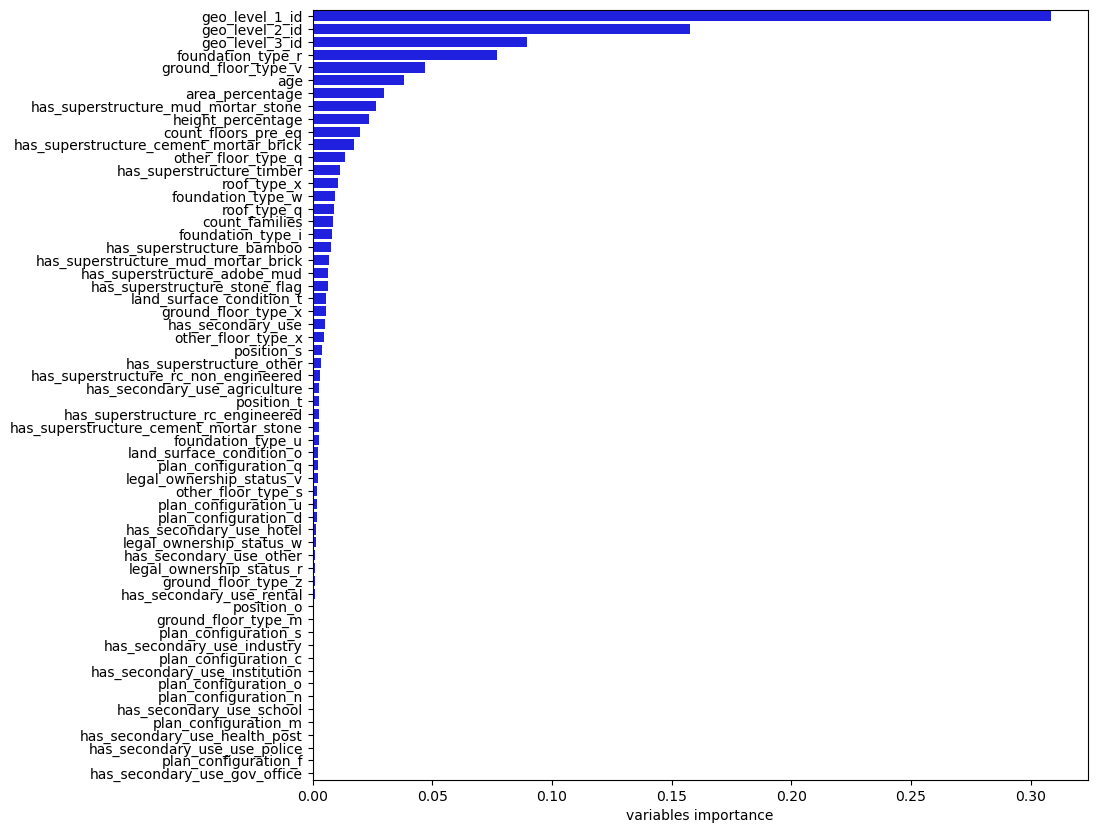

In [250]:
plt.figure(figsize=(10, 10))
sns.barplot(x=var_imp_df['variables importance'], y=var_imp_df.index,
            color='blue', data=var_imp_df)
plt.show()

# Results Compare

In [251]:
perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882


In [253]:
figure_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


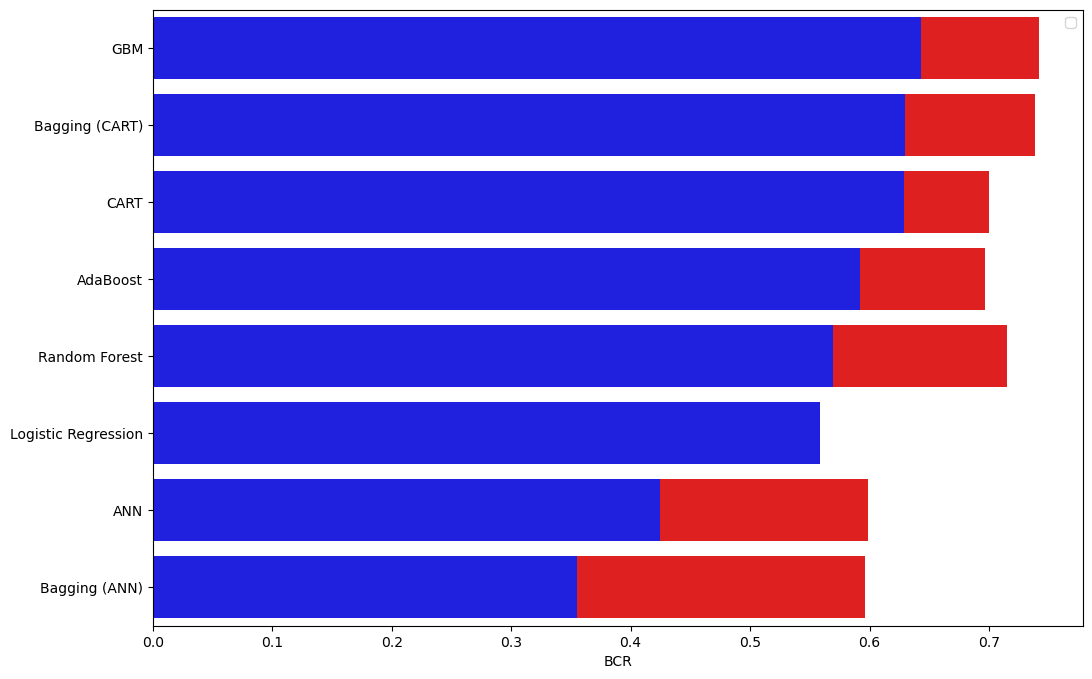

In [254]:
#plot the performance table
plt.figure(figsize=(12, 8))
try:
    figure_table = perf_table.drop(['ANN_10'], axis=0)
    figure_table = figure_table.drop(['ANN_bagging_10'], axis=0)
except:
    pass
figure_table = figure_table.sort_values('BCR', ascending=False)
sns.barplot(x=figure_table['Accuracy'], y=figure_table.index,
            color='red', data=figure_table)
sns.barplot(x=figure_table['BCR'], y=figure_table.index,
            color='blue', data=figure_table)
plt.legend()

# Extra Analysis

데이터 전처리 관점에서 불균형을 해소하여 분류 성능을 향상시킬 수 있는 아이디어를 제시하고 실험을 통해 검증해라.

In [255]:
y_train_L.value_counts()

2    113948
3     66892
1     19160
Name: damage_grade, dtype: int64

- 2번 범주와 3번범주의 양은 굉장히 많으나, 1번범주의 양은 적음. 어떻게 이를 해소할 수 있을까?


 idea 1.  범주 비율을 맞추고 나누어서 다양한 종류의 데이터 집합을 만들고 이를 앙상블하면 좋지 않을까?

 

In [256]:
round((113948/19160),), round((113948/66892),)

(6, 2)

In [257]:
dataset = pd.concat([X_train_L, y_train_L], axis=1)

y_1 = dataset[dataset['damage_grade']==1]
y_2 = dataset[dataset['damage_grade']==2]
y_3 = dataset[dataset['damage_grade']==3]

In [258]:
# y1 6개, y2한개 y3 3개로 데이터를 부풀림.
dataset_expanded = pd.concat([y_1,y_1,y_1,y_1,y_1,y_1, y_2, y_3, y_3])
X_train_E = dataset_expanded.drop('damage_grade', axis=1)
y_train_E = dataset_expanded['damage_grade']

In [259]:
dataset_expanded

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
207882,-0.112073,-1.655096,-0.290392,-0.178274,-0.156799,-0.004110,-0.226419,-2.351760,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
148981,-0.983414,-0.068025,-0.273389,3.944513,-0.088832,0.678916,4.986219,0.038365,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
151984,-0.983414,1.337320,-0.096501,1.195989,-0.360698,5.004744,1.858636,0.038365,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
242751,-0.983414,1.337320,-0.873439,2.570251,-0.360698,1.134266,3.943691,0.038365,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
143225,1.506130,-0.671355,-0.545715,-0.178274,-0.088832,0.451241,-0.226419,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.385835,-1.143841,0.125364,-0.178274,-0.156799,-0.687135,-0.747683,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
119879,-0.485505,1.710464,1.549249,-0.178274,0.047100,-0.687135,-0.226419,0.038365,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
259178,-0.112073,0.503805,-1.270273,-0.178274,-0.020866,-0.459460,-0.226419,-2.351760,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
103694,-0.485505,1.686233,0.527683,-0.178274,-0.292732,-0.687135,-0.747683,0.038365,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [260]:
try: 
    #load the dataset
    gbm_expanded = pd.read_csv('GBM_expanded.csv', header=None) 
except:
    best_n_estimators = gbm_model.get_params()['n_estimators']
    best_subsample = gbm_model.get_params()['subsample']
    best_max_depth = gbm_model.get_params()['max_depth']
    best_max_features = gbm_model.get_params()['max_features']

    #가장 성능이 좋았던 gradient boosting model을 학습해보자.
    gbm_model = GradientBoostingClassifier(n_estimators=best_n_estimators, subsample=best_subsample, max_depth=best_max_depth, max_features=best_max_features, random_state=42)
    gbm_model.fit(X_train_E, y_train_E)

    pd.DataFrame((perf_eval_fc(gbm_model.predict(X_test), y_test))).T.to_csv('GBM_expanded.csv', index=False, header=False)

    perf_table.loc['GBM_expanded'] = perf_eval_fc(gbm_model.predict(X_test), y_test)

perf_table.loc['GBM_expanded'] = gbm_expanded.values[0]


In [261]:
perf_table

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
ANN_10,0.5933(0.008868),0.371565(0.044632)
ANN_bagging_10,0.596002(0.000486),0.357404(0.003957)
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882


In [262]:
perf_table.drop(['ANN_10','ANN_bagging_10'], axis=0,)

,Accuracy,BCR
Logistic Regression,0.505355,0.558135
CART,0.700005,0.628834
ANN,0.59834,0.424984
Bagging (CART),0.738833,0.629297
Random Forest,0.715054,0.56925
Bagging (ANN),0.595997,0.35536
AdaBoost,0.696705,0.591945
GBM,0.741522,0.642882
GBM_expanded,0.689923,0.729675
